## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data=pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")
# Display the data table for preview
combine_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#what am I looking at pt1
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
#what am i looking at pt2
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Checking the number of mice.
##should be 249 given mouse_metadata "Mouse ID" but lets check both lists
Total_MiceMetadata = len(mouse_metadata["Mouse ID"].unique())
Total_MiceMetadata

249

In [5]:
# Checking the number of mice. pt2
##should be 249 given mouse_metadata "Mouse ID" but lets check both lists
Total_MiceStudy = len(study_results["Mouse ID"].unique())
Total_MiceStudy

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# next step both gets all data for all duplicates and shows duplicates


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
unique_mice=combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint']),:]
unique_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_data=combine_data[combine_data['Mouse ID']!="g989"]
Clean_data.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [9]:
# Checking the number of mice in the clean DataFrame.
len(Clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_study= Clean_data.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tum_mean=summary_study['Tumor Volume (mm3)'].mean()
tum_med=summary_study['Tumor Volume (mm3)'].median()
tum_var=summary_study['Tumor Volume (mm3)'].var()
tum_stdev=summary_study['Tumor Volume (mm3)'].std()
tum_sem=summary_study['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.

Summary_table=pd.DataFrame({'Mean':tum_mean,
                           'Median':tum_med,
                           'Variance':tum_var,
                           'Standard Deviation':tum_stdev,
                           'SEM':tum_sem})
Summary_table



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Summ_agg_tbl=summary_study.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
Summ_agg_tbl

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

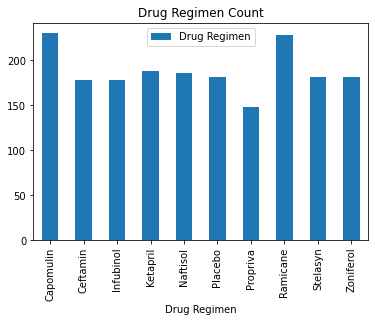

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#"summary_study" has the data grouped by drug regimen

Regimen_count=pd.DataFrame(summary_study['Drug Regimen'].count())

Bar_chart= Regimen_count.plot(title="Drug Regimen Count", kind='bar')
Bar_chart

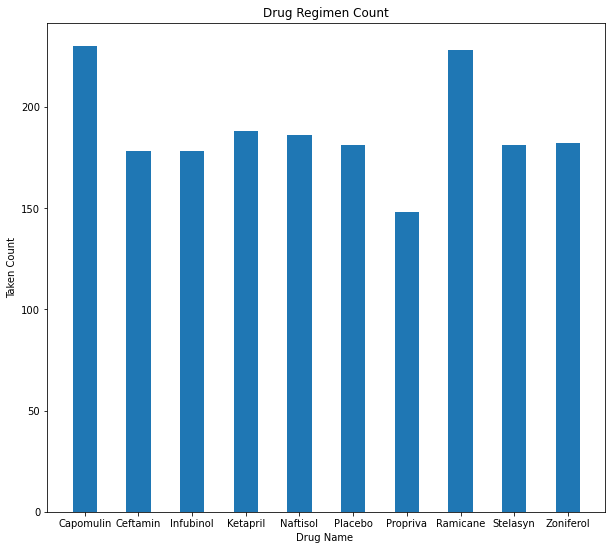

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#Regimen_count will do as a base

#x axis
x_axis=np.arange(len(Regimen_count))



#create table
plt.figure(figsize=(10,9))
plt.bar(x_axis, Regimen_count["Drug Regimen"], width=.45)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(Regimen_count.index))



# set lables
plt.title("Drug Regimen Count")
plt.xlabel("Drug Name ")
plt.ylabel("Taken Count")



plt.show()

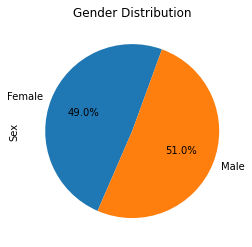

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#base to groupby and cont
Mice_gender=Clean_data.groupby('Sex')
Gender_count=Mice_gender['Sex'].count()

Gender_count.plot(title="Gender Distribution", kind='pie',autopct="%1.1f%%", startangle=70)
#ask if there is a way to remove y axis title "SEX"

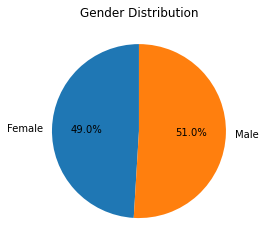

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(Gender_count, labels=Gender_count.index, autopct="%1.1f%%",startangle=90)

plt.title("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# create df that only inlcude the 4 drugs
Drugs=['Capomulin', 'Ramicane','Infubinol', 'Cetafim']
FourRegiment_data=Clean_data[Clean_data['Drug Regimen'].isin(Drugs)]

FourRegiment_data.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [52]:
# Start by getting the last (greatest) timepoint for each mouse
Last_Tumor=FourRegiment_data[FourRegiment_data['Timepoint']==45]

Last_Tumor=Last_Tumor.sort_values("Drug Regimen",ascending=True)

Last_Tumor.head(30)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
440,i557,Capomulin,Female,1,24,45,47.685963,1
350,v923,Capomulin,Female,19,21,45,40.658124,2
337,j119,Capomulin,Female,7,23,45,38.125164,1
380,l509,Capomulin,Male,17,21,45,41.483008,3
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
282,l897,Capomulin,Male,17,19,45,38.846876,1
390,r944,Capomulin,Male,12,25,45,41.581521,2
244,g288,Capomulin,Male,3,19,45,37.074024,1
224,w914,Capomulin,Male,24,21,45,36.041047,2


In [34]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Tumor_analisis=Last_Tumor["Tumor Volume (mm3)"]

quartiles=Tumor_analisis.quantile([.25,.5,.75])
lowerq = quartiles [.25]
upperq = quartiles [.75]
iqr = upperq-lowerq

print(f"The lower quartile  is: {lowerq}")
print(f"The upper quartile  is: {upperq}")
print(f"The interquartile  is: {iqr}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


The lower quartile  is: 32.527648109999994
The upper quartile  is: 41.5568924675
The interquartile  is: 9.029244357500005
Values below 18.983781573749987 could be outliers.
Values above 55.10075900375001 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x23bc3a85fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x23bc3a92710>,
 'boxes': [<matplotlib.lines.Line2D at 0x23bc3a85cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x23bc3a92e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x23bc3a9b1d0>],
 'means': []}

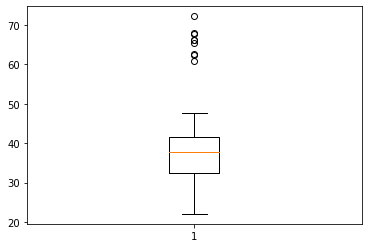

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(Tumor_analisis)

## Line and Scatter Plots

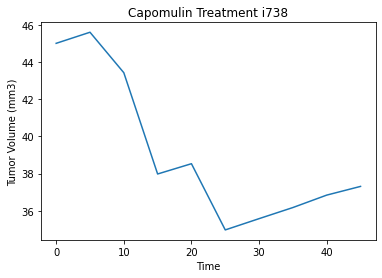

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# .loc a Mouse ID with capomulin
mouse_info=Clean_data.loc[Clean_data["Mouse ID"]=="i738"]

Line_chart= plt.plot(mouse_info["Timepoint"],mouse_info["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment i738")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

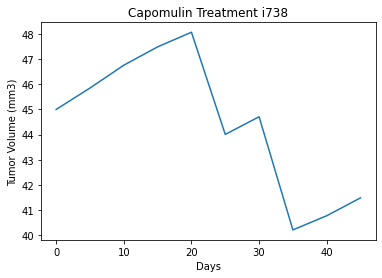

In [60]:
#EXTRA Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# .loc a Mouse ID with capomulin
mouse_info=Clean_data.loc[Clean_data["Mouse ID"]=="l509"]

Line_chart= plt.plot(mouse_info["Timepoint"],mouse_info["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment i738")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

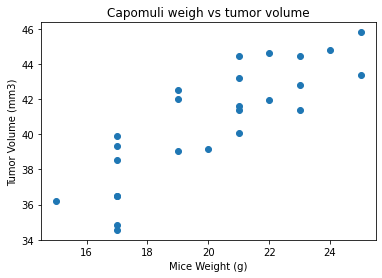

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#.loc Capo cases
Capo_data=Clean_data.loc[Clean_data["Drug Regimen"]=="Capomulin"]
CapoM_AWeight=Capo_data.groupby("Mouse ID")["Weight (g)"].mean()
CapoT_Asize=Capo_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(CapoM_AWeight, CapoT_Asize)
plt.title("Capomuli weigh vs tumor volume")
plt.xlabel("Mice Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr(CapoM_AWeight, CapoT_Asize)
print(f"The correlation between mouse weight and tumor volume for the Capomuli regime is {round(correlation [0],3)}")

The correlation between mouse weight and tumor volume for the Capomuli regime is 0.842


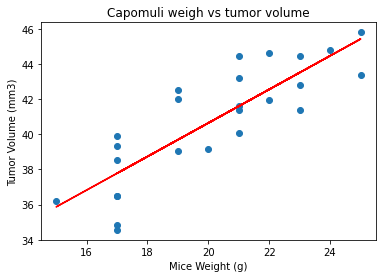

In [35]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(CapoM_AWeight, CapoT_Asize)
regress_values = CapoM_AWeight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(CapoM_AWeight,CapoT_Asize)
plt.plot(CapoM_AWeight,regress_values,"r-")
plt.title("Capomuli weight vs tumor volume")
plt.xlabel("Mice Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

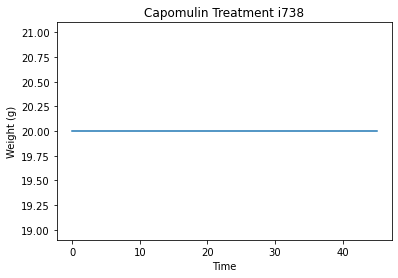

In [50]:
# EXTRA Generate a line plot of weight vs. time point for a mouse treated with Capomulin
# .loc a Mouse ID with capomulin
mouse_info=Clean_data.loc[Clean_data["Mouse ID"]=="i738"]

Line_chart= plt.plot(mouse_info["Timepoint"],mouse_info["Weight (g)"])
plt.title("Capomulin Treatment i738")
plt.xlabel("Days")
plt.ylabel("Weight (g)")
plt.show()

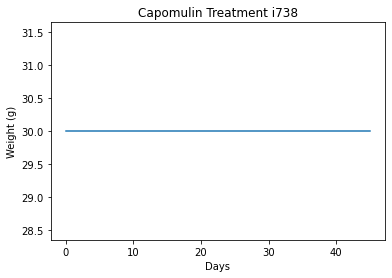

In [53]:
# EXTRA Generate a line plot of weight vs. time point for a mouse treated with Capomulin
# .loc a Mouse ID with capomulin
mouse_info=Clean_data.loc[Clean_data["Mouse ID"]=="z969"]

Line_chart= plt.plot(mouse_info["Timepoint"],mouse_info["Weight (g)"])
plt.title("Capomulin Treatment i738")
plt.xlabel("Days")
plt.ylabel("Weight (g)")
plt.show()

The study showed that the data of mouse "g989" was duplicated and was therefore dropped.
Capomulin and Ramicane are the best performing in terms of reducing tumor size and having more consistent/stable results (presenting less variation).
On the other hand Naftisol and Ketapril seem to have had an overall negative effect when compared to placebos.
There appears to be a direct correlation between the weight of the mouse and the tumor volume, at least in regards to the Capomuli trials. This might be indicative that the drug while "effective" at reducing tumor volume but it could also be indicative that mouse weight is negatively affected by the drug, in the case of mouse i738 this does not appear to be the case since he did not show a change in weight, however a time comparission between mouse weight and tumor size grouped by drug would be usefull in determining which drug regimens had less of a negative effect on the health of the mice.
In future studies the percentages of male vs female should be 50-50 accros the board for every drug in order to avoid skewing the results, even if it is by 2 o 1 percent.
Further studies should also be more focused or divided agewise given that the drug might have different effects depending on the development stage of the mouse.
The data could show some corruption since it dosent appear that any of the mice had weight change during the program. It could be the case that one of the issues with cancer treatment (weight loss) does not affect mice, but it is doubfull that such was the case across all of the drugs.
It is highly suspect that the "volume" of tumors in each mouse did not increase or showed a correlation between the volume of tumors and number of metastistic sites. It might be the case that only the primary tumor was considered for volume and not the rest, this could sow doubt about the effectivness of the drug, perhaps Capomulin is good at reducing tumor size but wholy ineffective at stopping the spread of the cancer (metastistic sites).
Finally it is worth noting that in Capomulin trials, while there is a significant reduction in tumor size the 
Final notes, SSC cancer has a metastisis rate of about 10% (on humans) so it might be concerning that most mice developed metastistic sites